# 1. Importar librerias

* Data analysis: Numpy, Pandas
* Visualización: matplotlib, matplotlib.pyplot

In [109]:
# Data analysis
import numpy as np
import pandas as pd
import random

#Visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris, load_boston


# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

In [ ]:
#xls = pd.read_excel("C:/Users/Claudia/Documents/GitHub/EDA-Human-Serum-Metabolome-Variability/src/data/study_data.xlsx")
#df1 = pd.read_excel(xls, sheet_name= "data_matrix")

# 2. Cargar datos
## 2.1 Dataset informacion general de estudio

In [49]:
#Dataset información general del estudio
sample_metadata = pd.read_excel("C:/Users/Claudia/Documents/GitHub/EDA-Human-Serum-Metabolome-Variability/src/data/sample_metadata.xlsx")
sample_metadata.head()

,sample_id,sample_id_study,CLIENT_IDENTIFIER,CLIENT_MATRIX,DAY,Health,Time,HEALTH_STATUS,RUN_DAY,SAMPLE_AMT,SUBJECT,Time Point,study_group,sex,BMI,hba1c
0,sample_0001,2904988,101-d2-MMT(-0.5h)-S002,Serum,D2,Healthy,Pre,healthy subjects,1,200 ul,101,pre,Healthy_D2_Pre,f,27.9,5.05
1,sample_0002,2904989,101-d2-MMT(+1h)-S032,Serum,D2,Healthy,Post,healthy subjects,1,200 ul,101,1h,Healthy_D2_Post,f,27.9,5.05
2,sample_0003,2904991,101-d14-MMT(-0.5h)-S002,Serum,D14,Healthy,Pre,healthy subjects,1,200 ul,101,pre,Healthy_D14_Pre,f,27.9,5.05
3,sample_0004,2904992,101-d14-MMT(+1h)-S032,Serum,D14,Healthy,Post,healthy subjects,1,200 ul,101,1h,Healthy_D14_Post,f,27.9,5.05
4,sample_0005,2904994,101-d28-MMT(-0.5h)-S002,Serum,D28,Healthy,Pre,healthy subjects,1,200 ul,101,pre,Healthy_D28_Pre,f,27.9,5.05


In [50]:
#Nombre de las columnas
sample_metadata.columns

Index(['sample_id', 'sample_id_study', 'CLIENT_IDENTIFIER', 'CLIENT_MATRIX',
       'DAY', 'Health', 'Time', 'HEALTH_STATUS', 'RUN_DAY', 'SAMPLE_AMT',
       'SUBJECT', 'Time Point', 'study_group', 'sex', 'BMI', 'hba1c'],
      dtype='object')

***Features***

    *sample_id: ID único de muestra
    *sample_id_study: 
    *CLIENT_IDENTIFIER:
    *CLIENT_MATRIX: Tipo de muestra extraída:
    *DAY:
    *Health: 
    *Time:
    *HEALTH_STATUS:
    *RUN_DAY:
    *SAMPLE_AMT:
    *SUBJECT:
    *Time Point:
    *study_group:
    *sex:
    *BMI:
    *hba1:




In [55]:
#información básica del dataset, tipos de datos y columnas
sample_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sample_id          180 non-null    object 
 1   sample_id_study    180 non-null    int64  
 2   CLIENT_IDENTIFIER  180 non-null    object 
 3   CLIENT_MATRIX      180 non-null    object 
 4   DAY                180 non-null    object 
 5   Health             180 non-null    object 
 6   Time               180 non-null    object 
 7   HEALTH_STATUS      180 non-null    object 
 8   RUN_DAY            180 non-null    int64  
 9   SAMPLE_AMT         180 non-null    object 
 10  SUBJECT            180 non-null    int64  
 11  Time Point         180 non-null    object 
 12  study_group        180 non-null    object 
 13  sex                180 non-null    object 
 14  BMI                180 non-null    float64
 15  hba1c              180 non-null    float64
dtypes: float64(2), int64(3), o

## 2.2 Dataset principal metabolitos encontrados

In [52]:
#Dataset principal de metabolitos encontrados 
data_matrix = pd.read_excel("C:/Users/Claudia/Documents/GitHub/EDA-Human-Serum-Metabolome-Variability/src/data/test.xlsx")
data_matrix.head()

,HEALTH_STATUS,Sample_id,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,...,X - 24542,X - 24546,X - 24549,X - 24559,X - 24585,X - 24699,X - 24728,X - 24738,X - 24748,X - 24766
0,Healthy,sample_0001,0.793620,0.743363,0.360069,0.557168,0.886952,0.698678,0.811203,0.546670,...,0.004096,0.517077,0.661523,0.957021,1.384068,0.690831,0.865679,0.254363,1.369263,0.898327
1,Healthy,sample_0002,0.713684,0.762673,0.716626,0.739390,0.921852,0.814239,0.858662,0.633751,...,2.576258,0.534857,0.570957,1.111478,1.115342,0.917702,0.371899,0.244953,1.417962,1.023614
2,Healthy,sample_0003,1.073165,1.184788,0.448938,0.609914,0.861769,1.064785,1.129699,1.094749,...,0.003518,0.858642,0.463791,1.064177,1.036884,0.736977,0.919946,0.209242,1.028140,1.718457
3,Healthy,sample_0004,1.074977,0.959059,0.695333,0.699223,0.893694,1.294579,1.062554,1.362446,...,2.320197,0.770668,0.628167,1.075152,0.744478,0.750908,0.392298,0.211141,1.126669,2.942013
4,Healthy,sample_0005,0.903153,0.442795,0.444998,0.668752,0.917792,0.832667,1.031598,0.645060,...,0.001692,0.637424,0.862852,1.147057,1.206461,0.506770,0.651075,0.679437,0.936695,0.993321


***Features***

    -HEALTH_STATUS: 
    -Sample_id:
El resto de columnas corresponden a cada uno de los metabolitos medidos, aquellos que no fueron identificados llevan por nombre  X- número

In [60]:
# Información del tamaño del dataset
print("El dataset tiene {0} Filas".format(data_matrix.shape[0]))
print("El dataset tiene {0} Columnas".format(data_matrix.shape[1]))

El dataset tiene 180 Filas
El dataset tiene 1488 Columnas


In [61]:
#revisar valores nulos
data_matrix.isna()

,HEALTH_STATUS,Sample_id,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,...,X - 24542,X - 24546,X - 24549,X - 24559,X - 24585,X - 24699,X - 24728,X - 24738,X - 24748,X - 24766
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
np.sum(data_matrix.isna())

HEALTH_STATUS      0
Sample_id          0
glycine            0
N-acetylglycine    0
sarcosine          0
                  ..
X - 24699          0
X - 24728          0
X - 24738          0
X - 24748          0
X - 24766          0
Length: 1488, dtype: int64

## 2.3 Dataset clasificación de los compuestos

In [128]:
data_dictionary = pd.read_excel("C:/Users/Claudia/Documents/GitHub/EDA-Human-Serum-Metabolome-Variability/src/data/Data_dictionary.xlsx")
data_dictionary.head()

,compound_id,PATHWAY_SORTORDER,BIOCHEMICAL,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,RI,MASS,PUBCHEM,KEGG,HMDB_ID
0,compound_0001,1,glycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",58,LC/MS Pos Early,1375,76.0393,750,C00037,HMDB00123
1,compound_0002,2,N-acetylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",27710,LC/MS Neg,731,116.0353,10972,NaN,HMDB00532
2,compound_0003,4,sarcosine,Amino Acid,"Glycine, Serine and Threonine Metabolism",1516,LC/MS Pos Early,1280,90.055,1088,C00213,HMDB00271
3,compound_0004,5,dimethylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",5086,LC/MS Pos Early,1104,104.0706,673,C01026,HMDB00092
4,compound_0005,6,betaine,Amino Acid,"Glycine, Serine and Threonine Metabolism",3141,LC/MS Pos Early,1064,118.0863,247,C00719,HMDB00043


In [130]:
data_dictionary.columns

Index(['compound_id', 'PATHWAY_SORTORDER', 'BIOCHEMICAL', 'SUPER_PATHWAY',
       'SUB_PATHWAY', 'COMP_ID', 'PLATFORM', 'RI', 'MASS', 'PUBCHEM', 'KEGG',
       'HMDB_ID'],
      dtype='object')

# **EDA**

In [69]:
# Grupos de estudio

Grupos_de_estudio= sample_metadata['HEALTH_STATUS'].value_counts()
Grupos_de_estudio

healthy subjects     60
prediabetic          60
diabetic subjects    60
Name: HEALTH_STATUS, dtype: int64

In [74]:
#Pasar los datos a formato lista para después hacer el gráfico 
Diagnostico= sample_metadata['HEALTH_STATUS'].unique().tolist()
Diagnostico

['healthy subjects', 'prediabetic', 'diabetic subjects']

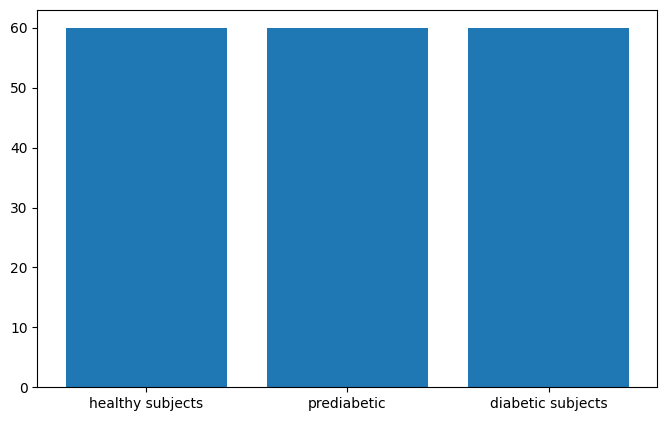

In [73]:
plt.figure(figsize=(8,5), dpi=100)
plt.bar(Diagnostico, Grupos_de_estudio)
plt.show()

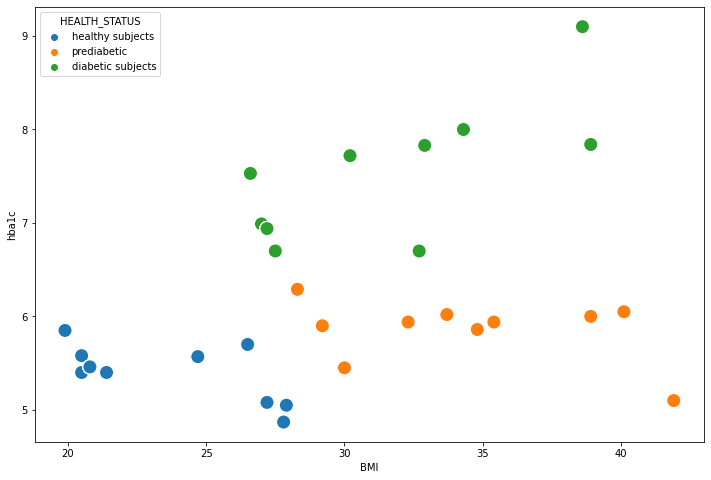

In [97]:
#Evaluar la relación del BMI y hba1c de cada grupo mediante un scatter
plt.figure(figsize=(12,8))
sns.scatterplot(x = sample_metadata["BMI"],
y = sample_metadata["hba1c"],
s= 200,   #tamaño de los circulos
hue = sample_metadata["HEALTH_STATUS"]);

In [104]:
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, run

In [121]:
#Evaluar la relación del BMI y hba1c de cada grupo mediante un gráfico de barras iteractivo

trace1 = go.Bar(x = sample_metadata["HEALTH_STATUS"],
                y = sample_metadata['BMI'],
                name = 'BMI',
                marker = dict(color = 'rgba(255, 185, 225, 0.5)'),
                )

trace2 = go.Bar(x = sample_metadata["HEALTH_STATUS"],
               y = sample_metadata['hba1c'],
               name = 'hba1c',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)'),
               )

data = [trace1, trace2] 

layout = go.Layout(barmode = "group") 

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [123]:
x = sample_metadata.HEALTH_STATUS

trace1 = {
    'x': x,
    'y': sample_metadata['BMI'],
    'name': 'BMI',
    'type': 'bar'

}

trace2 = {
    'x': x,
    'y': sample_metadata['hba1c'],
    'name': 'hba1c',
    'type': 'bar'

}

data = [trace1, trace2]

layout  = {
    'xaxis': {'title': 'HEALTH STATUS'},
    'barmode': 'group',  #agrupa tambien hay la opcion de apilar
    'title': 'Relacion entre BMI y hba1c'

}


fig = go.Figure(data = data, layout = layout)
iplot(fig)

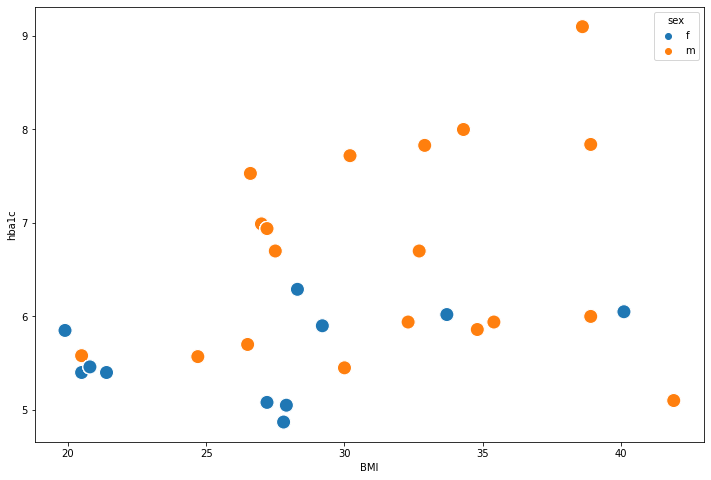

In [124]:
#Evaluar la relación del BMI y hba1c de cada grupo mediante un scatter
plt.figure(figsize=(12,8))
sns.scatterplot(x = sample_metadata["BMI"],
y = sample_metadata["hba1c"],
s= 200,   #tamaño de los circulos
hue = sample_metadata["sex"]);

In [126]:
x = sample_metadata.sex

trace1 = {
    'x': x,
    'y': sample_metadata['BMI'],
    'name': 'BMI',
    'type': 'bar'

}

trace2 = {
    'x': x,
    'y': sample_metadata['hba1c'],
    'name': 'hba1c',
    'type': 'bar'

}

data = [trace1, trace2]

layout  = {
    'xaxis': {'title': 'genero'},
    'barmode': 'group',  #agrupa tambien hay la opcion de apilar
    'title': 'Relacion entre BMI y hba1c de acuerdo al genero'

}


fig = go.Figure(data = data, layout = layout)
iplot(fig)